In [1]:
import struct         #Interpret bytes or string as packed binary data
import numpy as np
from sklearn import svm, metrics
import matplotlib.pyplot as plt

In [3]:
def read_idx(filename):  #Function for reading files having handwritten images
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
raw_train = read_idx("train-images.idx3-ubyte") #Training
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx("train-labels.idx1-ubyte")

raw_test = read_idx("t10k-images.idx3-ubyte")  #Testing
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx("t10k-labels.idx1-ubyte")

C:\Users\hp\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [5]:
idx = (train_label == 1)|(train_label == 4)|(train_label == 7)|(train_label == 9) #Having large file training done only for images having label as 1,4,7,9
X = train_data[idx]/255.0
Y = train_label[idx]
svc = svm.SVC(C=5, gamma=0.05).fit(X, Y)

In [5]:
idx = (test_label == 1)|(test_label == 4)|(test_label == 7)|(test_label == 9) # testing done only for images having label as 1,4,7,9
x_test = test_data[idx]/255.0
y_true = test_label[idx]
y_pred = svc.predict(x_test)

In [6]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',  #Function for plotting confusion matrix
                         cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[1131    0    4    0]
 [   0  975    0    7]
 [   4    2 1014    8]
 [   3    9    5  992]]


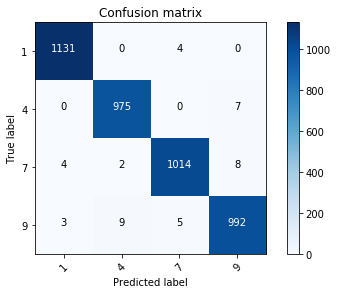

In [7]:
cm = metrics.confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ["1","4","7","9"], normalize=False) #Plotting confusion matrix for images 1,4,7,9
plt.show()

In [8]:
print("Accuracy={}".format(metrics.accuracy_score(y_true, y_pred))) #Percentage accuracy

Accuracy=0.9898892633606162


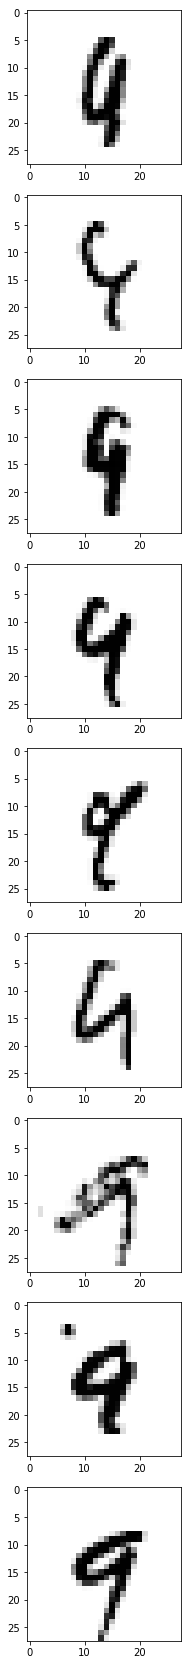

In [9]:
idx = np.where((y_pred == 4) & (y_true == 9))[0]  #Comparing digit which is actually 9 but has been predicted to be 4
fig = plt.figure(figsize=(5, 30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(np.reshape(x_test[idx[i],:], (28,28)), cmap = plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()    

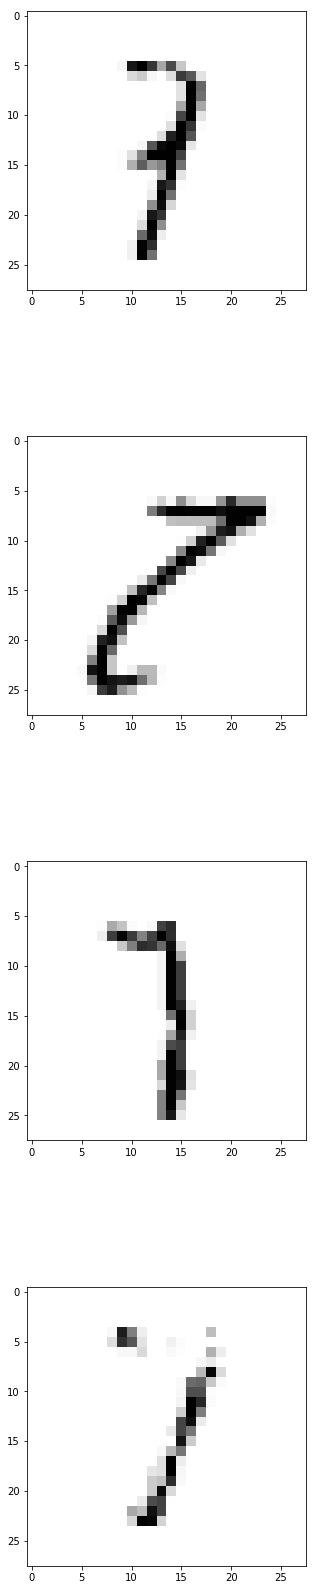

In [10]:
idx = np.where((y_pred == 1) & (y_true == 7))[0]  #Comparing digit which is actually 7 but has been predicted to be 1
fig = plt.figure(figsize=(5, 30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(np.reshape(x_test[idx[i],:], (28,28)), cmap = plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()    